In [441]:
import pandas as pd 
import numpy as np
import datetime

pd.set_option('display.max_columns', None)

In [659]:
#load data
df = pd.read_csv('../../data/127000_rand.csv')

In [660]:
df.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-06-07,DL,DL,DL,1826,DL,N805DN,1826,10397,ATL,"Atlanta, GA",11697,FLL,"Fort Lauderdale, FL",1310,1322.0,12.0,8.0,1330.0,1826.0,8.0,1501,1834.0,NaN,0,NaN,1,N,111,NaN,NaN,1,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,-4.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-06-07,DL,DL,DL,2292,DL,N335NB,2292,12953,LGA,"New York, NY",13487,MSP,"Minneapolis, MN",1825,1824.0,-1.0,22.0,1846.0,2012.0,10.0,2034,2022.0,-12.0,0,NaN,0,N,189,178.0,146.0,1,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-06-07,DL,DL,DL,2415,DL,N988AT,2415,10397,ATL,"Atlanta, GA",11618,EWR,"Newark, NJ",2232,2224.0,-8.0,21.0,2245.0,29.0,3.0,41,32.0,-9.0,0,NaN,0,N,129,128.0,104.0,1,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-06-07,DL,DL,DL,2444,DL,N391DA,2444,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1100,1234.0,94.0,19.0,1253.0,1346.0,11.0,1243,1357.0,74.0,0,NaN,0,N,103,83.0,53.0,1,337,0.0,0.0,5.0,0.0,69.0,NaN,NaN,NaN,NaN


## Flights Table: Processing

### Row Reduction

In [661]:
def remove_rows(df):
    """
    remove outlier rows and certain null values
        - arr_delay outliers above 350
        - arr_delay where null
    """

    df = df.loc[(df['arr_delay'].notnull()) | (df['arr_delay'] <= 350)]
    df = df.loc[df['arr_delay'] <= 350]
    #df = df.loc[df['taxi_out'] <= 75]
    #df = df.loc[df['taxi_in'] <= 75]

    return df

In [662]:
df = remove_rows(df)

In [663]:
df.shape

(124723, 42)

In [664]:
df.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
count,124723.000000,124723.000000,124723.000000,124723.000000,124723.000000,124723.000000,124685.000000,124671.000000,124671.000000,124671.000000,124671.000000,124723.000000,124723.000000,124723.000000,124723.0,124723.0,124723.000000,124723.000000,124671.000000,124723.0,124723.000000,23677.000000,23677.000000,23677.000000,23677.000000,23677.000000,793.000000,793.000000,793.000000,0.0
mean,2730.316622,2730.304667,12684.961082,12683.441819,1327.313936,1333.214098,8.942904,17.503076,1357.715948,1458.580127,7.665488,1481.739711,1462.757503,3.919165,0.0,0.0,137.778156,132.746823,107.619719,1.0,767.230190,17.016767,2.693584,15.434219,0.073531,25.358449,1301.828499,34.706179,34.423707,NaN
std,1863.907719,1863.934718,1524.738958,1524.085781,489.889169,503.568978,34.967641,10.026306,505.016242,532.219567,6.067400,517.131918,536.612048,37.791648,0.0,0.0,71.537491,71.331341,69.332711,0.0,582.921351,37.525917,16.875234,29.735593,2.306995,43.914750,489.815963,27.659970,27.409899,NaN
min,1.000000,1.000000,10135.000000,10135.000000,4.000000,1.000000,-41.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-99.000000,0.0,0.0,20.000000,16.000000,8.000000,1.0,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,1.000000,1.000000,NaN
25%,1124.000000,1124.000000,11292.000000,11292.000000,914.000000,917.000000,-6.000000,11.000000,932.000000,1043.000000,4.000000,1059.000000,1047.000000,-15.000000,0.0,0.0,87.000000,82.000000,58.000000,1.0,342.000000,0.000000,0.000000,0.000000,0.000000,0.000000,843.000000,16.000000,16.000000,NaN
50%,2306.000000,2306.000000,12889.000000,12889.000000,1319.000000,1325.000000,-2.000000,15.000000,1339.000000,1458.000000,6.000000,1510.000000,1501.000000,-6.000000,0.0,0.0,119.000000,114.000000,89.000000,1.0,604.000000,0.000000,0.000000,3.000000,0.000000,3.000000,1317.000000,28.000000,28.000000,NaN
75%,4314.000000,4314.000000,14057.000000,14057.000000,1734.000000,1743.000000,6.000000,20.000000,1759.000000,1908.000000,9.000000,1915.000000,1913.000000,8.000000,0.0,0.0,167.000000,162.000000,136.000000,1.0,1005.000000,17.000000,0.000000,20.000000,0.000000,32.000000,1709.000000,43.000000,42.000000,NaN
max,9388.000000,9388.000000,16869.000000,16869.000000,2359.000000,2400.000000,376.000000,194.000000,2400.000000,2400.000000,164.000000,2400.000000,2400.000000,350.000000,0.0,0.0,1512.000000,698.000000,648.000000,1.0,5095.000000,344.000000,335.000000,349.000000,198.000000,344.000000,2356.000000,166.000000,166.000000,NaN


### create datetime columns

In [665]:
def create_datetime(df):
    """
    creates columns for month, year, hour onto the dataframe
    """
    df['month'] = pd.DatetimeIndex(df['fl_date']).month
    df['year'] = pd.DatetimeIndex(df['fl_date']).year
    df['day'] = pd.DatetimeIndex(df['fl_date']).dayofweek
    df['dep_hour'] = df['crs_dep_time'].round(-2)/100
    df['arr_hour']= df['crs_arr_time'].round(-2)/100

    return df


In [666]:
create_datetime(df)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,day,dep_hour,arr_hour
1,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,-4.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,10.0,12.0
2,2018-06-07,DL,DL,DL,2292,DL,N335NB,2292,12953,LGA,"New York, NY",13487,MSP,"Minneapolis, MN",1825,1824.0,-1.0,22.0,1846.0,2012.0,10.0,2034,2022.0,-12.0,0,NaN,0,N,189,178.0,146.0,1,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,18.0,20.0
3,2018-06-07,DL,DL,DL,2415,DL,N988AT,2415,10397,ATL,"Atlanta, GA",11618,EWR,"Newark, NJ",2232,2224.0,-8.0,21.0,2245.0,29.0,3.0,41,32.0,-9.0,0,NaN,0,N,129,128.0,104.0,1,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,22.0,0.0
4,2018-06-07,DL,DL,DL,2444,DL,N391DA,2444,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1100,1234.0,94.0,19.0,1253.0,1346.0,11.0,1243,1357.0,74.0,0,NaN,0,N,103,83.0,53.0,1,337,0.0,0.0,5.0,0.0,69.0,NaN,NaN,NaN,NaN,6,2018,3,11.0,12.0
5,2018-06-07,DL,DL,DL,2461,DL,N323US,2461,12339,IND,"Indianapolis, IN",11433,DTW,"Detroit, MI",1542,1538.0,-4.0,10.0,1548.0,1629.0,11.0,1650,1640.0,-10.0,0,NaN,0,N,68,62.0,41.0,1,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,15.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127475,2018-06-07,UA,UA_CODESHARE,UA,3855,ZW,N448AW,3855,12339,IND,"Indianapolis, IN",13930,ORD,"Chicago, IL",1655,1642.0,-13.0,12.0,1654.0,1640.0,14.0,1705,1654.0,-11.0,0,NaN,0,N,70,72.0,46.0,1,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,17.0,17.0
127476,2018-06-07,DL,DL,DL,1107,DL,N776DE,1107,13204,MCO,"Orlando, FL",11193,CVG,"Cincinnati, OH",1112,1138.0,26.0,11.0,1149.0,1333.0,5.0,1314,1338.0,24.0,0,NaN,0,N,122,120.0,104.0,1,757,0.0,0.0,0.0,0.0,24.0,NaN,NaN,NaN,NaN,6,2018,3,11.0,13.0
127477,2018-06-07,DL,DL,DL,1269,DL,N3771K,1269,11433,DTW,"Detroit, MI",12892,LAX,"Los Angeles, CA",1750,1748.0,-2.0,13.0,1801.0,1906.0,5.0,1938,1911.0,-27.0,0,NaN,0,N,288,263.0,245.0,1,1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,18.0,19.0
127478,2018-06-07,DL,DL,DL,1347,DL,N6701,1347,12892,LAX,"Los Angeles, CA",13487,MSP,"Minneapolis, MN",1315,1329.0,14.0,17.0,1346.0,1851.0,4.0,1854,1855.0,1.0,0,NaN,0,N,219,206.0,185.0,1,1535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,13.0,19.0


### Create is_late column

In [667]:
def create_is_late(df):
    """
    creates a column 0/1 to indicate if the flight was late or not
    """
    df['is_late'] = df['arr_delay'].apply(lambda x: 1 if x > 0 else 0)

    return df

In [668]:
create_is_late(df)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,day,dep_hour,arr_hour,is_late
1,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,-4.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,10.0,12.0,0
2,2018-06-07,DL,DL,DL,2292,DL,N335NB,2292,12953,LGA,"New York, NY",13487,MSP,"Minneapolis, MN",1825,1824.0,-1.0,22.0,1846.0,2012.0,10.0,2034,2022.0,-12.0,0,NaN,0,N,189,178.0,146.0,1,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,18.0,20.0,0
3,2018-06-07,DL,DL,DL,2415,DL,N988AT,2415,10397,ATL,"Atlanta, GA",11618,EWR,"Newark, NJ",2232,2224.0,-8.0,21.0,2245.0,29.0,3.0,41,32.0,-9.0,0,NaN,0,N,129,128.0,104.0,1,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,22.0,0.0,0
4,2018-06-07,DL,DL,DL,2444,DL,N391DA,2444,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1100,1234.0,94.0,19.0,1253.0,1346.0,11.0,1243,1357.0,74.0,0,NaN,0,N,103,83.0,53.0,1,337,0.0,0.0,5.0,0.0,69.0,NaN,NaN,NaN,NaN,6,2018,3,11.0,12.0,1
5,2018-06-07,DL,DL,DL,2461,DL,N323US,2461,12339,IND,"Indianapolis, IN",11433,DTW,"Detroit, MI",1542,1538.0,-4.0,10.0,1548.0,1629.0,11.0,1650,1640.0,-10.0,0,NaN,0,N,68,62.0,41.0,1,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,15.0,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127475,2018-06-07,UA,UA_CODESHARE,UA,3855,ZW,N448AW,3855,12339,IND,"Indianapolis, IN",13930,ORD,"Chicago, IL",1655,1642.0,-13.0,12.0,1654.0,1640.0,14.0,1705,1654.0,-11.0,0,NaN,0,N,70,72.0,46.0,1,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,17.0,17.0,0
127476,2018-06-07,DL,DL,DL,1107,DL,N776DE,1107,13204,MCO,"Orlando, FL",11193,CVG,"Cincinnati, OH",1112,1138.0,26.0,11.0,1149.0,1333.0,5.0,1314,1338.0,24.0,0,NaN,0,N,122,120.0,104.0,1,757,0.0,0.0,0.0,0.0,24.0,NaN,NaN,NaN,NaN,6,2018,3,11.0,13.0,1
127477,2018-06-07,DL,DL,DL,1269,DL,N3771K,1269,11433,DTW,"Detroit, MI",12892,LAX,"Los Angeles, CA",1750,1748.0,-2.0,13.0,1801.0,1906.0,5.0,1938,1911.0,-27.0,0,NaN,0,N,288,263.0,245.0,1,1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,18.0,19.0,0
127478,2018-06-07,DL,DL,DL,1347,DL,N6701,1347,12892,LAX,"Los Angeles, CA",13487,MSP,"Minneapolis, MN",1315,1329.0,14.0,17.0,1346.0,1851.0,4.0,1854,1855.0,1.0,0,NaN,0,N,219,206.0,185.0,1,1535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,13.0,19.0,1


### Create Speed Column

In [669]:
def create_speed(df):
    """
    create column calculating expected speed of flight. miles/minute
    """
    df['speed'] = (df['distance'] / df['crs_elapsed_time']).round(2)

    return df

In [670]:
create_speed(df)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,day,dep_hour,arr_hour,is_late,speed
1,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,-4.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,10.0,12.0,0,5.43
2,2018-06-07,DL,DL,DL,2292,DL,N335NB,2292,12953,LGA,"New York, NY",13487,MSP,"Minneapolis, MN",1825,1824.0,-1.0,22.0,1846.0,2012.0,10.0,2034,2022.0,-12.0,0,NaN,0,N,189,178.0,146.0,1,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,18.0,20.0,0,5.40
3,2018-06-07,DL,DL,DL,2415,DL,N988AT,2415,10397,ATL,"Atlanta, GA",11618,EWR,"Newark, NJ",2232,2224.0,-8.0,21.0,2245.0,29.0,3.0,41,32.0,-9.0,0,NaN,0,N,129,128.0,104.0,1,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,22.0,0.0,0,5.78
4,2018-06-07,DL,DL,DL,2444,DL,N391DA,2444,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1100,1234.0,94.0,19.0,1253.0,1346.0,11.0,1243,1357.0,74.0,0,NaN,0,N,103,83.0,53.0,1,337,0.0,0.0,5.0,0.0,69.0,NaN,NaN,NaN,NaN,6,2018,3,11.0,12.0,1,3.27
5,2018-06-07,DL,DL,DL,2461,DL,N323US,2461,12339,IND,"Indianapolis, IN",11433,DTW,"Detroit, MI",1542,1538.0,-4.0,10.0,1548.0,1629.0,11.0,1650,1640.0,-10.0,0,NaN,0,N,68,62.0,41.0,1,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,15.0,16.0,0,3.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127475,2018-06-07,UA,UA_CODESHARE,UA,3855,ZW,N448AW,3855,12339,IND,"Indianapolis, IN",13930,ORD,"Chicago, IL",1655,1642.0,-13.0,12.0,1654.0,1640.0,14.0,1705,1654.0,-11.0,0,NaN,0,N,70,72.0,46.0,1,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,17.0,17.0,0,2.53
127476,2018-06-07,DL,DL,DL,1107,DL,N776DE,1107,13204,MCO,"Orlando, FL",11193,CVG,"Cincinnati, OH",1112,1138.0,26.0,11.0,1149.0,1333.0,5.0,1314,1338.0,24.0,0,NaN,0,N,122,120.0,104.0,1,757,0.0,0.0,0.0,0.0,24.0,NaN,NaN,NaN,NaN,6,2018,3,11.0,13.0,1,6.20
127477,2018-06-07,DL,DL,DL,1269,DL,N3771K,1269,11433,DTW,"Detroit, MI",12892,LAX,"Los Angeles, CA",1750,1748.0,-2.0,13.0,1801.0,1906.0,5.0,1938,1911.0,-27.0,0,NaN,0,N,288,263.0,245.0,1,1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,18.0,19.0,0,6.87
127478,2018-06-07,DL,DL,DL,1347,DL,N6701,1347,12892,LAX,"Los Angeles, CA",13487,MSP,"Minneapolis, MN",1315,1329.0,14.0,17.0,1346.0,1851.0,4.0,1854,1855.0,1.0,0,NaN,0,N,219,206.0,185.0,1,1535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,13.0,19.0,1,7.01


### Transform: 0 any Early flight in column arr_delay

In [671]:
def transform_early_flights(df):
    """
    makes any departure & arrival delays < 0 into 0
    """

    df['arr_delay'] = df['arr_delay'].apply(lambda x: x if x > 0 else 0)
    df['dep_delay'] = df['dep_delay'].apply(lambda x: x if x > 0 else 0)


    return df

In [672]:
transform_early_flights(df)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,day,dep_hour,arr_hour,is_late,speed
1,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,0.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,10.0,12.0,0,5.43
2,2018-06-07,DL,DL,DL,2292,DL,N335NB,2292,12953,LGA,"New York, NY",13487,MSP,"Minneapolis, MN",1825,1824.0,0.0,22.0,1846.0,2012.0,10.0,2034,2022.0,0.0,0,NaN,0,N,189,178.0,146.0,1,1020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,18.0,20.0,0,5.40
3,2018-06-07,DL,DL,DL,2415,DL,N988AT,2415,10397,ATL,"Atlanta, GA",11618,EWR,"Newark, NJ",2232,2224.0,0.0,21.0,2245.0,29.0,3.0,41,32.0,0.0,0,NaN,0,N,129,128.0,104.0,1,746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,22.0,0.0,0,5.78
4,2018-06-07,DL,DL,DL,2444,DL,N391DA,2444,14771,SFO,"San Francisco, CA",12892,LAX,"Los Angeles, CA",1100,1234.0,94.0,19.0,1253.0,1346.0,11.0,1243,1357.0,74.0,0,NaN,0,N,103,83.0,53.0,1,337,0.0,0.0,5.0,0.0,69.0,NaN,NaN,NaN,NaN,6,2018,3,11.0,12.0,1,3.27
5,2018-06-07,DL,DL,DL,2461,DL,N323US,2461,12339,IND,"Indianapolis, IN",11433,DTW,"Detroit, MI",1542,1538.0,0.0,10.0,1548.0,1629.0,11.0,1650,1640.0,0.0,0,NaN,0,N,68,62.0,41.0,1,231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,15.0,16.0,0,3.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127475,2018-06-07,UA,UA_CODESHARE,UA,3855,ZW,N448AW,3855,12339,IND,"Indianapolis, IN",13930,ORD,"Chicago, IL",1655,1642.0,0.0,12.0,1654.0,1640.0,14.0,1705,1654.0,0.0,0,NaN,0,N,70,72.0,46.0,1,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,17.0,17.0,0,2.53
127476,2018-06-07,DL,DL,DL,1107,DL,N776DE,1107,13204,MCO,"Orlando, FL",11193,CVG,"Cincinnati, OH",1112,1138.0,26.0,11.0,1149.0,1333.0,5.0,1314,1338.0,24.0,0,NaN,0,N,122,120.0,104.0,1,757,0.0,0.0,0.0,0.0,24.0,NaN,NaN,NaN,NaN,6,2018,3,11.0,13.0,1,6.20
127477,2018-06-07,DL,DL,DL,1269,DL,N3771K,1269,11433,DTW,"Detroit, MI",12892,LAX,"Los Angeles, CA",1750,1748.0,0.0,13.0,1801.0,1906.0,5.0,1938,1911.0,0.0,0,NaN,0,N,288,263.0,245.0,1,1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,18.0,19.0,0,6.87
127478,2018-06-07,DL,DL,DL,1347,DL,N6701,1347,12892,LAX,"Los Angeles, CA",13487,MSP,"Minneapolis, MN",1315,1329.0,14.0,17.0,1346.0,1851.0,4.0,1854,1855.0,1.0,0,NaN,0,N,219,206.0,185.0,1,1535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,13.0,19.0,1,7.01


## Creation of Airports Stats Table

In [673]:
def create_table_airports(df):
    """
    input flights table and create a unique airports table with stats that will be used for features later
    """
    df_airports = df.copy()
    df_airports = df[['origin_airport_id', 'origin', 'origin_city_name']]
    df_airports = df_airports.drop_duplicates(subset=['origin_airport_id'])
    df_airports.rename(columns={'origin_airport_id': 'airport_id', 'origin':'airport_code'}, inplace=True)
    split = df_airports['origin_city_name'].str.split(",", n=1, expand=True)
    df_airports['city'] = split[0]
    df_airports['state'] = split[1]
    df_airports.drop('origin_city_name', axis=1, inplace=True)
    
    return df_airports

In [674]:
df_airports = create_table_airports(df)
df_airports

,airport_id,airport_code,city,state
1,11042,CLE,Cleveland,OH
2,12953,LGA,New York,NY
3,10397,ATL,Atlanta,GA
4,14771,SFO,San Francisco,CA
5,12339,IND,Indianapolis,IN
...,...,...,...,...
81669,11336,DLG,Dillingham,AK
87262,10590,IFP,Bullhead City,AZ
105202,13829,OGD,Ogden,UT
109120,12250,HYA,Hyannis,MA


### Create mean departure delay column

In [675]:
def create_dep_delay(df_flights, df_airports):
    """
    creates a column showing mean departure delay for each airport
    we used mean because previously have 0d out any negatives and medium results in 0 99% of the time
    """
    airports_temp = pd.DataFrame(df_flights.groupby('origin_airport_id').agg('mean')['dep_delay'])
    airports_temp['dep_delay'] = airports_temp['dep_delay'].round(2)
    airports_temp.reset_index(inplace=True)
    airports_temp.rename(columns={'origin_airport_id':'airport_id'}, inplace=True)

    df_airports = df_airports.merge(airports_temp, on='airport_id')
    df_airports.rename(columns={'dep_delay':'mean_d_delay'}, inplace=True)

    return df_airports


In [676]:
df_airports = create_dep_delay(df, df_airports)

In [677]:
df_airports

,airport_id,airport_code,city,state,mean_d_delay
0,11042,CLE,Cleveland,OH,11.45
1,12953,LGA,New York,NY,15.03
2,10397,ATL,Atlanta,GA,10.26
3,14771,SFO,San Francisco,CA,14.42
4,12339,IND,Indianapolis,IN,11.37
...,...,...,...,...,...
369,11336,DLG,Dillingham,AK,0.00
370,10590,IFP,Bullhead City,AZ,1.00
371,13829,OGD,Ogden,UT,10.00
372,12250,HYA,Hyannis,MA,56.00


### Create mean arrival delay column

In [678]:
def create_arr_delay(df_flights, df_airports):
    """
    creates a column showing mean arrival delay for each airport
    we used mean because previously have 0d out any negatives and medium results in 0 99% of the time
    """
    airports_temp = pd.DataFrame(df_flights.groupby('dest_airport_id').agg('mean')['arr_delay'])
    airports_temp['arr_delay'] = airports_temp['arr_delay'].round(2)
    airports_temp.reset_index(inplace=True)
    airports_temp.rename(columns={'dest_airport_id':'airport_id'}, inplace=True)

    df_airports = df_airports.merge(airports_temp, on='airport_id')
    df_airports.rename(columns={'arr_delay':'mean_arr_delay'}, inplace=True)

    return df_airports

In [679]:
df_airports = create_arr_delay(df, df_airports)
df_airports

,airport_id,airport_code,city,state,mean_d_delay,mean_arr_delay
0,11042,CLE,Cleveland,OH,11.45,11.16
1,12953,LGA,New York,NY,15.03,18.02
2,10397,ATL,Atlanta,GA,10.26,8.93
3,14771,SFO,San Francisco,CA,14.42,17.22
4,12339,IND,Indianapolis,IN,11.37,13.09
...,...,...,...,...,...,...
366,10562,BFM,Mobile,AL,0.00,3.50
367,11336,DLG,Dillingham,AK,0.00,0.00
368,10590,IFP,Bullhead City,AZ,1.00,0.00
369,13829,OGD,Ogden,UT,10.00,0.00


### Create Departure Flight Count

In [680]:
def create_flight_counts(df_flights, df_airports):
    """
    add columns counting amount of flights in and out of the airports
    this will then be used to calculate a column about % delayed 
    """
    airports_temp = pd.DataFrame(df_flights.groupby('origin_airport_id').count()['flights'])
    airports_temp.reset_index(inplace=True)
    airports_temp.rename(columns={'origin_airport_id':'airport_id', 'flights':'dep_flight_count'}, inplace=True)
    df_airports = df_airports.merge(airports_temp, on='airport_id')
    
    airports_temp = pd.DataFrame(df_flights.groupby('dest_airport_id').count()['flights'])
    airports_temp.reset_index(inplace=True)
    airports_temp.rename(columns={'dest_airport_id':'airport_id', 'flights':'arr_flight_count'}, inplace=True)
    df_airports = df_airports.merge(airports_temp, on='airport_id')    
    
    return df_airports

In [681]:
df_airports = create_flight_counts(df, df_airports)

In [682]:
df_airports

,airport_id,airport_code,city,state,mean_d_delay,mean_arr_delay,dep_flight_count,arr_flight_count
0,11042,CLE,Cleveland,OH,11.45,11.16,793,836
1,12953,LGA,New York,NY,15.03,18.02,2642,2596
2,10397,ATL,Atlanta,GA,10.26,8.93,6288,6252
3,14771,SFO,San Francisco,CA,14.42,17.22,2721,2728
4,12339,IND,Indianapolis,IN,11.37,13.09,801,800
...,...,...,...,...,...,...,...,...
366,10562,BFM,Mobile,AL,0.00,3.50,3,4
367,11336,DLG,Dillingham,AK,0.00,0.00,3,1
368,10590,IFP,Bullhead City,AZ,1.00,0.00,1,1
369,13829,OGD,Ogden,UT,10.00,0.00,1,3


### Create Count of is_late Column

In [683]:
def create_delay_counts(df_flights, df_airports):
    """
    create columns counting number of flights lates for depart and arrival airports
    """
    airports_temp = pd.DataFrame(df_flights.groupby(by='origin_airport_id').agg('sum')['is_late'])
    airports_temp.reset_index(inplace=True)
    airports_temp.rename(columns={'origin_airport_id':'airport_id', 'is_late':'dep_late_count'}, inplace=True)
    df_airports = df_airports.merge(airports_temp, on='airport_id')

    airports_temp = pd.DataFrame(df_flights.groupby(by='dest_airport_id').agg('sum')['is_late'])
    airports_temp.reset_index(inplace=True)
    airports_temp.rename(columns={'dest_airport_id':'airport_id', 'is_late':'arr_late_count'}, inplace=True)
    df_airports = df_airports.merge(airports_temp, on='airport_id')

    return df_airports

In [684]:
df_airports = create_delay_counts(df, df_airports)
df_airports

,airport_id,airport_code,city,state,mean_d_delay,mean_arr_delay,dep_flight_count,arr_flight_count,dep_late_count,arr_late_count
0,11042,CLE,Cleveland,OH,11.45,11.16,793,836,267,268
1,12953,LGA,New York,NY,15.03,18.02,2642,2596,947,991
2,10397,ATL,Atlanta,GA,10.26,8.93,6288,6252,1949,1793
3,14771,SFO,San Francisco,CA,14.42,17.22,2721,2728,1008,1081
4,12339,IND,Indianapolis,IN,11.37,13.09,801,800,272,309
...,...,...,...,...,...,...,...,...,...,...
366,10562,BFM,Mobile,AL,0.00,3.50,3,4,2,2
367,11336,DLG,Dillingham,AK,0.00,0.00,3,1,1,0
368,10590,IFP,Bullhead City,AZ,1.00,0.00,1,1,1,0
369,13829,OGD,Ogden,UT,10.00,0.00,1,3,1,0


### Create % late Columns

In [685]:
def create_late_per(df_airports):
    """
    creates columns showing percent late for arrival and departing airports
    """
    df_airports['dep_late_perc'] = (df_airports['dep_late_count'] / df_airports['dep_flight_count']).round(3)
    df_airports['arr_late_perc'] = (df_airports['arr_late_count'] / df_airports['arr_flight_count']).round(3)

    return df_airports

In [686]:
create_late_per(df_airports)

,airport_id,airport_code,city,state,mean_d_delay,mean_arr_delay,dep_flight_count,arr_flight_count,dep_late_count,arr_late_count,dep_late_perc,arr_late_perc
0,11042,CLE,Cleveland,OH,11.45,11.16,793,836,267,268,0.337,0.321
1,12953,LGA,New York,NY,15.03,18.02,2642,2596,947,991,0.358,0.382
2,10397,ATL,Atlanta,GA,10.26,8.93,6288,6252,1949,1793,0.310,0.287
3,14771,SFO,San Francisco,CA,14.42,17.22,2721,2728,1008,1081,0.370,0.396
4,12339,IND,Indianapolis,IN,11.37,13.09,801,800,272,309,0.340,0.386
...,...,...,...,...,...,...,...,...,...,...,...,...
366,10562,BFM,Mobile,AL,0.00,3.50,3,4,2,2,0.667,0.500
367,11336,DLG,Dillingham,AK,0.00,0.00,3,1,1,0,0.333,0.000
368,10590,IFP,Bullhead City,AZ,1.00,0.00,1,1,1,0,1.000,0.000
369,13829,OGD,Ogden,UT,10.00,0.00,1,3,1,0,1.000,0.000


### Create taxi_time column

In [687]:
def create_taxi(df_flights, df_airports):
    """
    add columns shows mean taxi time
    this will then be used to calculate a column about % delayed 
    """
    airports_temp = pd.DataFrame(df_flights.groupby('origin_airport_id').agg('mean')['taxi_out'])
    airports_temp.reset_index(inplace=True)
    airports_temp.rename(columns={'origin_airport_id':'airport_id', 'taxi_out':'dep_taxi'}, inplace=True)
    df_airports = df_airports.merge(airports_temp, on='airport_id')
    
    airports_temp = pd.DataFrame(df_flights.groupby('dest_airport_id').agg('mean')['taxi_in'])
    airports_temp.reset_index(inplace=True)
    airports_temp.rename(columns={'dest_airport_id':'airport_id', 'taxi_in':'arr_taxi'}, inplace=True)
    df_airports = df_airports.merge(airports_temp, on='airport_id')    
    
    return df_airports

In [688]:
df_airports = create_taxi(df, df_airports)
create_taxi(df, df_airports)

,airport_id,airport_code,city,state,mean_d_delay,mean_arr_delay,dep_flight_count,arr_flight_count,dep_late_count,arr_late_count,dep_late_perc,arr_late_perc,dep_taxi_x,arr_taxi_x,dep_taxi_y,arr_taxi_y
0,11042,CLE,Cleveland,OH,11.45,11.16,793,836,267,268,0.337,0.321,15.717528,6.893541,15.717528,6.893541
1,12953,LGA,New York,NY,15.03,18.02,2642,2596,947,991,0.358,0.382,26.673732,8.894838,26.673732,8.894838
2,10397,ATL,Atlanta,GA,10.26,8.93,6288,6252,1949,1793,0.310,0.287,16.884860,8.701855,16.884860,8.701855
3,14771,SFO,San Francisco,CA,14.42,17.22,2721,2728,1008,1081,0.370,0.396,21.696435,8.572947,21.696435,8.572947
4,12339,IND,Indianapolis,IN,11.37,13.09,801,800,272,309,0.340,0.386,14.757803,6.193750,14.757803,6.193750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,10562,BFM,Mobile,AL,0.00,3.50,3,4,2,2,0.667,0.500,11.666667,10.250000,11.666667,10.250000
367,11336,DLG,Dillingham,AK,0.00,0.00,3,1,1,0,0.333,0.000,12.000000,6.000000,12.000000,6.000000
368,10590,IFP,Bullhead City,AZ,1.00,0.00,1,1,1,0,1.000,0.000,29.000000,3.000000,29.000000,3.000000
369,13829,OGD,Ogden,UT,10.00,0.00,1,3,1,0,1.000,0.000,18.000000,5.333333,18.000000,5.333333


## Create Tail Number Stats Table

In [689]:
def create_tail_table(df_flights):
    """
    creates tabel with tail number stats from flights table
    """
    df_tail = df_flights[['tail_num', 'fl_date', 'is_late', 'arr_delay', 'arr_time', 'distance', 'carrier_delay', 
                          'late_aircraft_delay', 'weather_delay']].groupby(by='tail_num').agg({'fl_date':'count', 
                                                                                               'is_late':'sum', 
                                                                                               'arr_delay':['median', 'mean', 'std'],
                                                                                               'arr_time':['median', 'mean'],
                                                                                               'distance':'mean',
                                                                                               'carrier_delay':'count',
                                                                                               'late_aircraft_delay':'count',
                                                                                               'weather_delay':'count'})
    df_tail['late_perc'] = (df_tail['is_late']['sum'] / df_tail['fl_date']['count']).round(3)


    return df_tail



In [690]:
df_tail = create_tail_table(df)
df_tail

fl_date is_late arr_delay                       arr_time  \
           count     sum    median       mean        std   median   
tail_num                                                            
215NV         18       6       0.0  23.444444  67.253010   1768.0   
216NV         22       9       0.0  14.772727  38.675613   1245.5   
217NV         19       9       0.0  32.421053  72.701304   1251.0   
218NV         13       8       5.0  12.461538  17.491023   1557.0   
219NV         27       9       0.0   5.333333  10.019212   1335.0   
...          ...     ...       ...        ...        ...      ...   
N998JB         5       3      29.0  33.200000  34.636686   1720.0   
N998JE         4       0       0.0   0.000000   0.000000   1440.0   
N998NN        21       9       0.0  14.952381  41.806072   1415.0   
N999DN        29       5       0.0   7.379310  18.959381   1601.0   
N999JQ         3       0       0.0   0.000000   0.000000    909.0   

                          distance carrier_delay late_aircraft_delay  \
                 mean         mean         count               count   
tail_num                                                               
215NV     1683.000000   887.500000             4                   4   
216NV     1373.772727   808.454545             5                   5   
217NV     1322.736842   938.105263             3                   3   
218NV     1589.692308   805.923077             4                   4   
219NV     1453.851852   788.000000             5                   5   
...               ...          ...           ...                 ...   
N998JB    1444.000000  1120.400000             3                   3   
N998JE    1476.250000  1241.000000             0                   0   
N998NN    1386.904762  1230.095238             4                   4   
N999DN    1539.137931   464.586207             4                   4   
N999JQ    1151.666667  1203.000000             0                   0   

         weather_delay late_perc  
                 count            
tail_num                          
215NV                4     0.333  
216NV                5     0.409  
217NV                3     0.474  
218NV                4     0.615  
219NV                5     0.333  
...                ...       ...  
N998JB               3     0.600  
N998JE               0     0.000  
N998NN               4     0.429  
N999DN               4     0.172  
N999JQ               0     0.000  

[6222 rows x 12 columns]

In [691]:
# we need to flattern the table of tail to m,ake it easier... whoops ... should add to function 
test = list(df_tail.columns.map('_'.join))
test
df_tail.columns = test
df_tail

,fl_date_count,is_late_sum,arr_delay_median,arr_delay_mean,arr_delay_std,arr_time_median,arr_time_mean,distance_mean,carrier_delay_count,late_aircraft_delay_count,weather_delay_count,late_perc_
tail_num,,,,,,,,,,,,
215NV,18,6,0.0,23.444444,67.253010,1768.0,1683.000000,887.500000,4,4,4,0.333
216NV,22,9,0.0,14.772727,38.675613,1245.5,1373.772727,808.454545,5,5,5,0.409
217NV,19,9,0.0,32.421053,72.701304,1251.0,1322.736842,938.105263,3,3,3,0.474
218NV,13,8,5.0,12.461538,17.491023,1557.0,1589.692308,805.923077,4,4,4,0.615
219NV,27,9,0.0,5.333333,10.019212,1335.0,1453.851852,788.000000,5,5,5,0.333
...,...,...,...,...,...,...,...,...,...,...,...,...
N998JB,5,3,29.0,33.200000,34.636686,1720.0,1444.000000,1120.400000,3,3,3,0.600
N998JE,4,0,0.0,0.000000,0.000000,1440.0,1476.250000,1241.000000,0,0,0,0.000
N998NN,21,9,0.0,14.952381,41.806072,1415.0,1386.904762,1230.095238,4,4,4,0.429


## Create Carrier Stats Table

In [692]:
def create_carrier_table(df_flights):
    """
    creates tabel with carrier stats from flights table
    """
    df_carrier = df_flights[['mkt_carrier', 'fl_date', 'is_late', 
                             'dep_delay', 'arr_delay', 'carrier_delay']].groupby(by='mkt_carrier').agg({'fl_date':'count',
                                                                                           'is_late':'sum',
                                                                                           'dep_delay': 'mean',
                                                                                           'arr_delay': 'mean',
                                                                                           'carrier_delay': 'mean'})
    df_carrier['late_perc'] = (df_carrier['is_late'] / df_carrier['fl_date']).round(3)
    df_carrier['carrier_delay'] = df_carrier['carrier_delay'].round(2)
    df_carrier['dep_delay'] = df_carrier['dep_delay'].round(2)
    df_carrier['arr_delay'] = df_carrier['arr_delay'].round(2)

    return df_carrier

In [693]:
df_carrier = create_carrier_table(df)
df_carrier 

,fl_date,is_late,dep_delay,arr_delay,carrier_delay,late_perc
mkt_carrier,,,,,,
AA,32243,11816,12.21,12.98,17.13,0.366
AS,6572,2332,7.79,8.93,13.66,0.355
B6,4740,1912,19.69,19.77,22.74,0.403
DL,27818,8041,10.38,10.41,18.70,0.289
F9,1988,860,20.48,19.92,19.17,0.433
G4,1627,611,14.02,14.59,20.97,0.376
HA,1404,500,5.48,6.53,23.46,0.356
NK,3058,978,11.24,11.45,11.11,0.320
UA,23993,8627,13.98,15.13,15.45,0.360


In [694]:
df_carrier.sort_values(by='fl_date', ascending=False)[0:4]
#maybe come back and bin the carriers by size

,fl_date,is_late,dep_delay,arr_delay,carrier_delay,late_perc
mkt_carrier,,,,,,
AA,32243,11816,12.21,12.98,17.13,0.366
DL,27818,8041,10.38,10.41,18.70,0.289
UA,23993,8627,13.98,15.13,15.45,0.360
WN,21146,7895,12.22,10.82,15.94,0.373


## Hourly Stats

In [695]:
def create_hourly_table(df_flights):
    """
    creates tabel with hourly stats from flights table
    """
    df_hours = df_flights[['dep_hour', 'fl_date', 'is_late', 
                             'dep_delay', 'arr_delay']].groupby(by='dep_hour').agg({'fl_date':'count',
                                                                                           'is_late':'sum',
                                                                                           'dep_delay': 'mean',
                                                                                           'arr_delay': 'mean'})
    df_hours['late_perc'] = (df_hours['is_late'] / df_hours['fl_date']).round(3)
    df_hours['dep_delay'] = df_hours['dep_delay'].round(2)
    df_hours['arr_delay'] = df_hours['arr_delay'].round(2)
    
    #bucket carrier category as orginal

    return df_hours

In [696]:
df_hourly = create_hourly_table(df)
df_hourly

,fl_date,is_late,dep_delay,arr_delay,late_perc
dep_hour,,,,,
0.0,203,58,10.68,9.06,0.286
1.0,149,40,10.25,9.30,0.268
2.0,36,16,21.31,19.83,0.444
3.0,28,10,29.75,27.64,0.357
4.0,25,10,25.16,21.96,0.400
5.0,2398,519,5.19,6.32,0.216
6.0,9107,2149,5.17,6.18,0.236
7.0,7883,2127,6.93,8.06,0.270
8.0,8698,2531,7.53,8.54,0.291


## Merge all wanted attributes onto the main dataframe

In [697]:
df_merged = df.copy(deep=True)

### Airport Merge

In [698]:
def get_features_airport(df_flights, df_airports):
    """
    merges engineered features from the airport stats table onto the main dataframe as additional columns
    """
    airport_dep = df_airports[['airport_id', 'mean_d_delay', 'dep_late_perc', 'dep_taxi']].rename(columns={'mean_d_delay':'air_mean_d_delay', 'dep_late_perc':'air_dep_late_perc', 'dep_taxi':'air_dep_taxi'})
    airport_arr = df_airports[['airport_id', 'mean_arr_delay', 'arr_late_perc', 'arr_taxi']].rename(columns={'mean_arr_delay':'air_mean_arr_delay', 'arr_late_perc':'air_arr_late_perc', 'arr_taxi':'air_arr_taxi'})

    #merge each onto the main dataframe and rename

    df_temp = df_flights.merge(airport_dep, left_on='origin_airport_id', right_on='airport_id')
    df_temp = df_temp.merge(airport_arr, left_on='dest_airport_id', right_on='airport_id')
    df_temp.drop(['airport_id_x', 'airport_id_y'], axis = 1, inplace=True)

    return df_temp



In [699]:
df_merged = get_features_airport(df_merged, df_airports)
df_merged

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,day,dep_hour,arr_hour,is_late,speed,air_mean_d_delay,air_dep_late_perc,air_dep_taxi,air_mean_arr_delay,air_arr_late_perc,air_arr_taxi
0,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,0.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,10.0,12.0,0,5.43,11.45,0.337,15.717528,8.93,0.287,8.701855
1,2018-06-14,WN,WN,WN,2487,WN,N735SA,2487,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",715,714.0,0.0,10.0,724.0,846.0,9.0,905,855.0,0.0,0,NaN,0,N,110,101.0,82.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,7.0,9.0,0,5.04,11.45,0.337,15.717528,8.93,0.287,8.701855
2,2018-06-20,DL,DL,DL,2528,DL,N943DN,2528,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1455,1454.0,0.0,9.0,1503.0,1619.0,4.0,1642,1623.0,0.0,0,NaN,0,N,107,89.0,76.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,2,15.0,16.0,0,5.18,11.45,0.337,15.717528,8.93,0.287,8.701855
3,2018-06-28,NK,NK,NK,241,NK,N514NK,241,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",600,552.0,0.0,12.0,604.0,727.0,8.0,748,735.0,0.0,0,NaN,0,N,108,103.0,83.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,6.0,7.0,0,5.13,11.45,0.337,15.717528,8.93,0.287,8.701855
4,2019-11-02,DL,DL,DL,1158,DL,N905DL,1158,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1700,1655.0,0.0,8.0,1703.0,1833.0,17.0,1848,1850.0,2.0,0,NaN,0,N,108,115.0,90.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2019,5,17.0,18.0,1,5.13,11.45,0.337,15.717528,8.93,0.287,8.701855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124711,2019-03-27,UA,UA_CODESHARE,UA,5102,OO,N479CA,5102,12519,JMS,"Jamestown, ND",11447,DVL,"Devils Lake, ND",1414,1348.0,0.0,17.0,1405.0,1432.0,5.0,1501,1437.0,0.0,0,NaN,0,N,47,49.0,27.0,1,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2019,2,14.0,15.0,0,1.77,28.00,0.500,19.142857,24.33,0.444,5.666667
124712,2018-11-05,UA,UA_CODESHARE,UA,5104,OO,N937EV,5104,12519,JMS,"Jamestown, ND",11447,DVL,"Devils Lake, ND",2314,2252.0,0.0,36.0,2328.0,2349.0,5.0,2359,2354.0,0.0,0,NaN,0,N,45,62.0,21.0,1,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2018,0,23.0,24.0,0,1.84,28.00,0.500,19.142857,24.33,0.444,5.666667
124713,2018-03-18,UA,UA_CODESHARE,UA,5104,OO,N970SW,5104,12519,JMS,"Jamestown, ND",11447,DVL,"Devils Lake, ND",2312,49.0,97.0,28.0,117.0,140.0,6.0,2359,146.0,107.0,0,NaN,0,N,47,57.0,23.0,1,83,97.0,0.0,10.0,0.0,0.0,NaN,NaN,NaN,NaN,3,2018,6,23.0,24.0,1,1.77,28.00,0.500,19.142857,24.33,0.444,5.666667
124714,2019-08-11,UA,UA_CODESHARE,UA,5102,OO,N417SW,5102,12519,JMS,"Jamestown, ND",11447,DVL,"Devils Lake, ND",1410,1414.0,4.0,15.0,1429.0,1456.0,3.0,1451,1459.0,8.0,0,NaN,0,N,41,45.0,27.0,1,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2019,6,14.0,15.0,1,2.02,28.00,0.500,19.142857,24.33,0.444,5.666667


### Hourly Merge

In [700]:
def merge_hourly(df_flights, df_hourly):
    """
    merges engineered features from the hourly stats table onto the main dataframe as additional columns
    """
    hourly_filter = df_hourly.reset_index()[['dep_hour', 'fl_date', 
                                             'arr_delay', 'late_perc']].rename(columns={'fl_date':'hour_count', 
                                                                                        'arr_delay':'hour_arr_delay',
                                                                                        'late_perc':'hour_late_perc'})
    df_temp = df_flights.merge(hourly_filter, left_on='dep_hour', right_on='dep_hour')
    #df_temp.drop(['airport_id_x', 'airport_id_y'], axis = 1, inplace=True)

    return df_temp


    

In [701]:
df_merged = merge_hourly(df_merged, df_hourly)
df_merged.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,day,dep_hour,arr_hour,is_late,speed,air_mean_d_delay,air_dep_late_perc,air_dep_taxi,air_mean_arr_delay,air_arr_late_perc,air_arr_taxi,hour_count,hour_arr_delay,hour_late_perc
0,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,0.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,10.0,12.0,0,5.43,11.45,0.337,15.717528,8.93,0.287,8.701855,8211,9.76,0.309
1,2019-04-05,DL,DL,DL,2365,DL,N928DN,2365,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1037.0,0.0,10.0,1047.0,1208.0,6.0,1224,1214.0,0.0,0,NaN,0,N,103,97.0,81.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2019,4,10.0,12.0,0,5.38,11.45,0.337,15.717528,8.93,0.287,8.701855,8211,9.76,0.309
2,2018-01-07,DL,DL,DL,2232,DL,N923DL,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1050,1104.0,14.0,20.0,1124.0,1250.0,7.0,1246,1257.0,11.0,0,NaN,0,N,116,113.0,86.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2018,6,10.0,12.0,1,4.78,11.45,0.337,15.717528,8.93,0.287,8.701855,8211,9.76,0.309
3,2018-11-06,DL,DL,DL,2232,DL,N976DL,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1049,1049.0,0.0,12.0,1101.0,1231.0,13.0,1229,1244.0,15.0,0,NaN,0,N,100,115.0,90.0,1,554,0.0,0.0,15.0,0.0,0.0,NaN,NaN,NaN,NaN,11,2018,1,10.0,12.0,1,5.54,11.45,0.337,15.717528,8.93,0.287,8.701855,8211,9.76,0.309
4,2018-06-03,DL,DL,DL,2232,DL,N918DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1033.0,0.0,10.0,1043.0,1159.0,5.0,1223,1204.0,0.0,0,NaN,0,N,102,91.0,76.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,6,10.0,12.0,0,5.43,11.45,0.337,15.717528,8.93,0.287,8.701855,8211,9.76,0.309


### Merge Tail Num Stats

In [702]:
def merge_tail(df_flights, df_tail):
    """
    merges engineered features from the Tail Num stats table onto the main dataframe as additional columns
    """
    tail_filter = df_tail.reset_index()[['tail_num', 'fl_date_count', 'arr_delay_mean', 'arr_delay_std', 'late_perc_']]
    tail_filter.rename(columns={'fl_date_count':'tail_count', 'arr_delay_mean':'tail_arr_delay','arr_delay_std':'tail_arr_delay_std' , 'late_perc_':'tail_late_perc'}, inplace=True)
    tail_filter['tail_arr_delay'] = tail_filter['tail_arr_delay'].round(2)
    tail_filter['tail_arr_delay_std'] = tail_filter['tail_arr_delay_std'].round(2)
    tail_filter.drop('tail_arr_delay_std', axis=1, inplace=True)

    df_output = df_flights.merge(tail_filter, left_on='tail_num', right_on='tail_num')

    return df_output

In [703]:
df_merged = merge_tail(df_merged, df_tail)
df_merged.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,day,dep_hour,arr_hour,is_late,speed,air_mean_d_delay,air_dep_late_perc,air_dep_taxi,air_mean_arr_delay,air_arr_late_perc,air_arr_taxi,hour_count,hour_arr_delay,hour_late_perc,tail_count,tail_arr_delay,tail_late_perc
0,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,0.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,10.0,12.0,0,5.43,11.45,0.337,15.717528,8.93,0.287,8.701855,8211,9.76,0.309,22,4.45,0.273
1,2019-06-05,DL,DL,DL,1379,DL,N912DE,1379,10397,ATL,"Atlanta, GA",10599,BHM,"Birmingham, AL",1050,1056.0,6.0,14.0,1110.0,1037.0,4.0,1042,1041.0,0.0,0,NaN,0,N,52,45.0,27.0,1,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2019,2,10.0,10.0,0,2.58,10.26,0.310,16.884860,15.86,0.396,4.050296,8211,9.76,0.309,22,4.45,0.273
2,2018-05-12,DL,DL,DL,2575,DL,N912DE,2575,10994,CHS,"Charleston, SC",10397,ATL,"Atlanta, GA",600,551.0,0.0,16.0,607.0,648.0,6.0,707,654.0,0.0,0,NaN,0,N,67,63.0,41.0,1,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2018,5,6.0,7.0,0,3.87,14.59,0.286,14.815981,8.93,0.287,8.701855,9107,6.18,0.236,22,4.45,0.273
3,2018-03-27,DL,DL,DL,1781,DL,N912DE,1781,10980,CHA,"Chattanooga, TN",10397,ATL,"Atlanta, GA",600,556.0,0.0,14.0,610.0,634.0,7.0,658,641.0,0.0,0,NaN,0,N,58,45.0,24.0,1,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2018,1,6.0,7.0,0,1.83,5.75,0.278,17.196203,8.93,0.287,8.701855,9107,6.18,0.236,22,4.45,0.273
4,2019-07-15,DL,DL,DL,1983,DL,N912DE,1983,14685,SAV,"Savannah, GA",10397,ATL,"Atlanta, GA",1659,1656.0,0.0,10.0,1706.0,1742.0,10.0,1807,1752.0,0.0,0,NaN,0,N,68,56.0,36.0,1,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2019,0,17.0,18.0,0,3.15,13.70,0.303,14.978873,8.93,0.287,8.701855,7421,17.31,0.417,22,4.45,0.273


### Merge Carrier

In [704]:
df_carrier

,fl_date,is_late,dep_delay,arr_delay,carrier_delay,late_perc
mkt_carrier,,,,,,
AA,32243,11816,12.21,12.98,17.13,0.366
AS,6572,2332,7.79,8.93,13.66,0.355
B6,4740,1912,19.69,19.77,22.74,0.403
DL,27818,8041,10.38,10.41,18.70,0.289
F9,1988,860,20.48,19.92,19.17,0.433
G4,1627,611,14.02,14.59,20.97,0.376
HA,1404,500,5.48,6.53,23.46,0.356
NK,3058,978,11.24,11.45,11.11,0.320
UA,23993,8627,13.98,15.13,15.45,0.360


In [705]:
def merge_carrier(df_flights, df_carrier):
    carrier_filter = df_carrier.reset_index()[['mkt_carrier', 'fl_date', 'arr_delay', 
                                               'carrier_delay', 'late_perc']].rename(columns={'fl_date':'carrier_count', 
                                                                                              'arr_delay':'carrier_arr_delay',
                                                                                              'carrier_delay':'carrier_carrier_delay',
                                                                                              'late_perc':'carrier_late_perc'})
    temp = df_flights.merge(carrier_filter, left_on='mkt_carrier', right_on='mkt_carrier')

    return temp

In [706]:
df_merged = merge_carrier(df_merged, df_carrier)
df_merged

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,year,day,dep_hour,arr_hour,is_late,speed,air_mean_d_delay,air_dep_late_perc,air_dep_taxi,air_mean_arr_delay,air_arr_late_perc,air_arr_taxi,hour_count,hour_arr_delay,hour_late_perc,tail_count,tail_arr_delay,tail_late_perc,carrier_count,carrier_arr_delay,carrier_carrier_delay,carrier_late_perc
0,2018-06-07,DL,DL,DL,2232,DL,N912DE,2232,11042,CLE,"Cleveland, OH",10397,ATL,"Atlanta, GA",1041,1041.0,0.0,10.0,1051.0,1210.0,9.0,1223,1219.0,0.0,0,NaN,0,N,102,98.0,79.0,1,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2018,3,10.0,12.0,0,5.43,11.45,0.337,15.717528,8.93,0.287,8.701855,8211,9.76,0.309,22,4.45,0.273,27818,10.41,18.70,0.289
1,2019-06-05,DL,DL,DL,1379,DL,N912DE,1379,10397,ATL,"Atlanta, GA",10599,BHM,"Birmingham, AL",1050,1056.0,6.0,14.0,1110.0,1037.0,4.0,1042,1041.0,0.0,0,NaN,0,N,52,45.0,27.0,1,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,2019,2,10.0,10.0,0,2.58,10.26,0.310,16.884860,15.86,0.396,4.050296,8211,9.76,0.309,22,4.45,0.273,27818,10.41,18.70,0.289
2,2018-05-12,DL,DL,DL,2575,DL,N912DE,2575,10994,CHS,"Charleston, SC",10397,ATL,"Atlanta, GA",600,551.0,0.0,16.0,607.0,648.0,6.0,707,654.0,0.0,0,NaN,0,N,67,63.0,41.0,1,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2018,5,6.0,7.0,0,3.87,14.59,0.286,14.815981,8.93,0.287,8.701855,9107,6.18,0.236,22,4.45,0.273,27818,10.41,18.70,0.289
3,2018-03-27,DL,DL,DL,1781,DL,N912DE,1781,10980,CHA,"Chattanooga, TN",10397,ATL,"Atlanta, GA",600,556.0,0.0,14.0,610.0,634.0,7.0,658,641.0,0.0,0,NaN,0,N,58,45.0,24.0,1,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2018,1,6.0,7.0,0,1.83,5.75,0.278,17.196203,8.93,0.287,8.701855,9107,6.18,0.236,22,4.45,0.273,27818,10.41,18.70,0.289
4,2019-07-15,DL,DL,DL,1983,DL,N912DE,1983,14685,SAV,"Savannah, GA",10397,ATL,"Atlanta, GA",1659,1656.0,0.0,10.0,1706.0,1742.0,10.0,1807,1752.0,0.0,0,NaN,0,N,68,56.0,36.0,1,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2019,0,17.0,18.0,0,3.15,13.70,0.303,14.978873,8.93,0.287,8.701855,7421,17.31,0.417,22,4.45,0.273,27818,10.41,18.70,0.289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124711,2018-07-25,HA,HA,HA,26,HA,N212HA,26,12173,HNL,"Honolulu, HI",14057,PDX,"Portland, OR",1330,1331.0,1.0,17.0,1348.0,2157.0,7.0,2200,2204.0,4.0,0,NaN,0,N,330,333.0,309.0,1,2603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2018,2,13.0,22.0,1,7.89,6.13,0.325,15.789082,8.48,0.329,4.726056,6641,12.81,0.359,9,12.00,0.778,1404,6.53,23.46,0.356
124712,2019-10-03,HA,HA,HA,68,HA,N212HA,68,12982,LIH,"Lihue, HI",13796,OAK,"Oakland, CA",1315,1324.0,9.0,14.0,1338.0,2144.0,7.0,2125,2151.0,26.0,0,NaN,0,N,310,327.0,306.0,1,2457,26.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,10,2019,3,13.0,21.0,1,7.93,5.06,0.355,9.777251,9.81,0.351,6.144019,6641,12.81,0.359,9,12.00,0.778,1404,6.53,23.46,0.356
124713,2019-11-07,HA,HA,HA,38,HA,N223HA,38,13830,OGG,"Kahului, HI",14679,SAN,"San Diego, CA",1140,1148.0,8.0,9.0,1157.0,1906.0,5.0,1900,1911.0,11.0,0,NaN,0,N,320,323.0,309.0,1,2541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,2019,3,11.0,19.0,1,7.94,6.13,0.342,10.398601,10.75,0.369,4.094241,7301,9.94,0.317,1,11.00,1.000,1404,6.53,23.46,0.356
124714,2019-07-19,HA,HA,HA,47,HA,N216HA,47,13796,OAK,"Oakland, CA",12173,HNL,"Honolulu, HI",930,927.0,0.0,10.0,937.0,1149.0,7.0,1155,1156.0,1.0,0,NaN,0,N,325,329.0,312.0,1,2409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,2019,4,9.0,12.0

## Check Merged Table for Errors

In [707]:
pd.DataFrame(df_merged.isnull().sum()).sort_values(by=0, ascending=False).head(20)

,0
no_name,124716
cancellation_code,124716
total_add_gtime,123923
longest_add_gtime,123923
first_dep_time,123923
late_aircraft_delay,101040
security_delay,101040
nas_delay,101040
weather_delay,101040
carrier_delay,101040


## Drop Columns

In [708]:
df_final = df_merged.copy().drop(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier','mkt_carrier_fl_num', 
                'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin_airport_id','origin', 'origin_city_name', 'dest_airport_id',
                'dest', 'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 
                'crs_arr_time', 'arr_time', 'cancelled', 'cancellation_code', 'diverted', 'dup', 'actual_elapsed_time', 'air_time', 'flights',
                'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'no_name', 'year'], axis=1)

df_final

,arr_delay,crs_elapsed_time,distance,month,day,dep_hour,arr_hour,is_late,speed,air_mean_d_delay,air_dep_late_perc,air_dep_taxi,air_mean_arr_delay,air_arr_late_perc,air_arr_taxi,hour_count,hour_arr_delay,hour_late_perc,tail_count,tail_arr_delay,tail_late_perc,carrier_count,carrier_arr_delay,carrier_carrier_delay,carrier_late_perc
0,0.0,102,554,6,3,10.0,12.0,0,5.43,11.45,0.337,15.717528,8.93,0.287,8.701855,8211,9.76,0.309,22,4.45,0.273,27818,10.41,18.70,0.289
1,0.0,52,134,6,2,10.0,10.0,0,2.58,10.26,0.310,16.884860,15.86,0.396,4.050296,8211,9.76,0.309,22,4.45,0.273,27818,10.41,18.70,0.289
2,0.0,67,259,5,5,6.0,7.0,0,3.87,14.59,0.286,14.815981,8.93,0.287,8.701855,9107,6.18,0.236,22,4.45,0.273,27818,10.41,18.70,0.289
3,0.0,58,106,3,1,6.0,7.0,0,1.83,5.75,0.278,17.196203,8.93,0.287,8.701855,9107,6.18,0.236,22,4.45,0.273,27818,10.41,18.70,0.289
4,0.0,68,214,7,0,17.0,18.0,0,3.15,13.70,0.303,14.978873,8.93,0.287,8.701855,7421,17.31,0.417,22,4.45,0.273,27818,10.41,18.70,0.289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124711,4.0,330,2603,7,2,13.0,22.0,1,7.89,6.13,0.325,15.789082,8.48,0.329,4.726056,6641,12.81,0.359,9,12.00,0.778,1404,6.53,23.46,0.356
124712,26.0,310,2457,10,3,13.0,21.0,1,7.93,5.06,0.355,9.777251,9.81,0.351,6.144019,6641,12.81,0.359,9,12.00,0.778,1404,6.53,23.46,0.356
124713,11.0,320,2541,11,3,11.0,19.0,1,7.94,6.13,0.342,10.398601,10.75,0.369,4.094241,7301,9.94,0.317,1,11.00,1.000,1404,6.53,23.46,0.356
124714,1.0,325,2409,7,4,9.0,12.0,1,7.41,9.92,0.337,12.616322,6.66,0.340,7.609357,6776,8.77,0.296,2,7.50,1.000,1404,6.53,23.46,0.356


## Save df_final

In [709]:
#df_final.to_csv('../../data/features_tuesday.csv')

df_final.to_csv('../../data/features_tuesday4.csv')

## Scrap

### Correlation Matrix against arr_delay.... 
lets come back and do this after we have joined all the stats

In [710]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [711]:
df_corr = df_final.copy()

In [712]:
# create focused datafame for this
df_corr.head(2)

,arr_delay,crs_elapsed_time,distance,month,day,dep_hour,arr_hour,is_late,speed,air_mean_d_delay,air_dep_late_perc,air_dep_taxi,air_mean_arr_delay,air_arr_late_perc,air_arr_taxi,hour_count,hour_arr_delay,hour_late_perc,tail_count,tail_arr_delay,tail_late_perc,carrier_count,carrier_arr_delay,carrier_carrier_delay,carrier_late_perc
0,0.0,102,554,6,3,10.0,12.0,0,5.43,11.45,0.337,15.717528,8.93,0.287,8.701855,8211,9.76,0.309,22,4.45,0.273,27818,10.41,18.7,0.289
1,0.0,52,134,6,2,10.0,10.0,0,2.58,10.26,0.310,16.884860,15.86,0.396,4.050296,8211,9.76,0.309,22,4.45,0.273,27818,10.41,18.7,0.289


<AxesSubplot:>

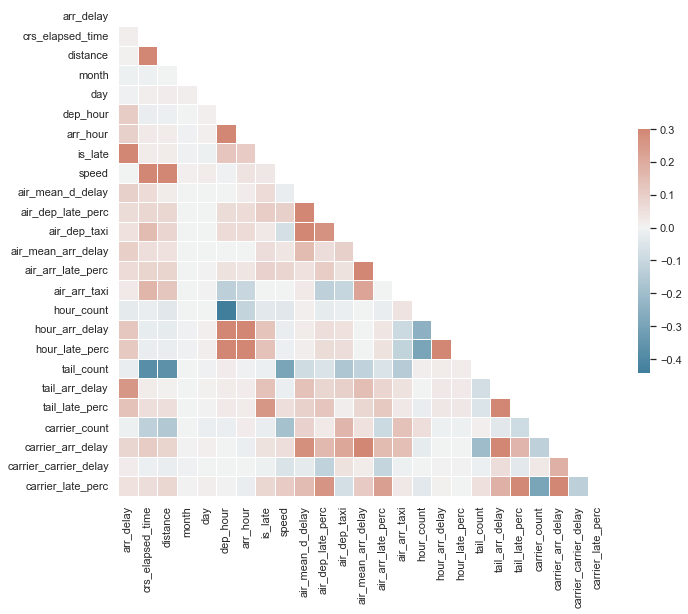

In [713]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### widgets

In [715]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [720]:
def hist(x):
    return sns.distplot(df[x])

interact(hist,
         x=df.dtypes[df.dtypes != 'object'].index
        )

interactive(children=(Dropdown(description='x', options=('mkt_carrier_fl_num', 'op_carrier_fl_num', 'origin_ai…

<function __main__.hist(x)>